# **Important to read**
> Data info from https://archive.ics.uci.edu/dataset/45/heart+disease

age: age in years

sex: sex (1 = male; 0 = female)

cp: chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

num: diagnosis of heart disease (angiographic disease status)
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

In [1]:
!pip install ucimlrepo -qq

# Import dependencies

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the Heart Disease UCI dataset

In [3]:
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets
print(X.shape, y.shape)

(303, 13) (303, 1)


In [4]:
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [5]:
df = pd.concat([X, y], axis=1)

print("Initial shape:", df.shape)
df.head()

Initial shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


# Handle missing values

In [7]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
imputer = SimpleImputer(strategy="median")
df[df.columns] = imputer.fit_transform(df)
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# One-Hot Encoding

In [9]:
label_col = "num"

cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

num_cols = [c for c in df.columns if c not in cat_cols + [label_col]]

print("Categorical cols:", cat_cols)
print("Numerical cols:", num_cols)

Categorical cols: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical cols: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']


In [10]:
ohe = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", ohe, cat_cols)
    ],
    remainder="drop"
)

X_clean = preprocessor.fit_transform(df)

feature_names = num_cols + list(
    preprocessor.named_transformers_["cat"].get_feature_names_out(cat_cols)
)

In [11]:
clean_df = pd.DataFrame(X_clean, columns=feature_names, index=df.index)

clean_df[label_col] = df[label_col].values

print("Cleaned dataset shape:", clean_df.shape)
clean_df.head()

Cleaned dataset shape: (303, 26)


,age,trestbps,chol,thalach,oldpeak,ca,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,restecg_2.0,exang_0.0,exang_1.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0,num
0,0.948726,0.757525,-0.264900,0.017197,1.087338,-0.711131,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2.504881,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1.432877,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,-0.711131,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,-0.711131,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Some EDA

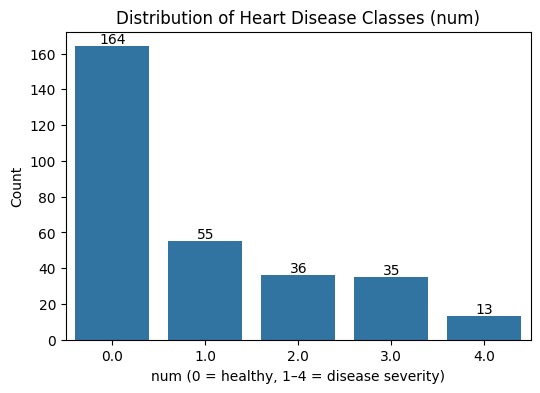

In [12]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df["num"])
plt.title("Distribution of Heart Disease Classes (num)")
plt.xlabel("num (0 = healthy, 1–4 = disease severity)")
plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()


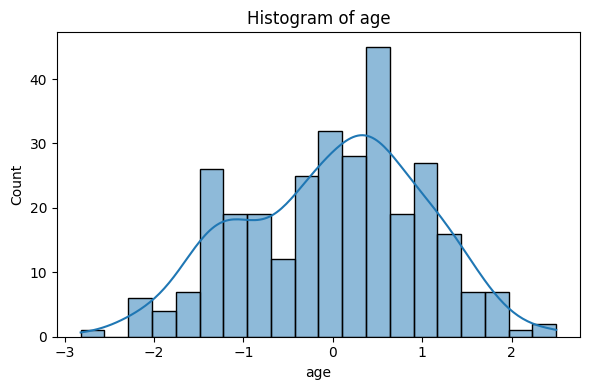

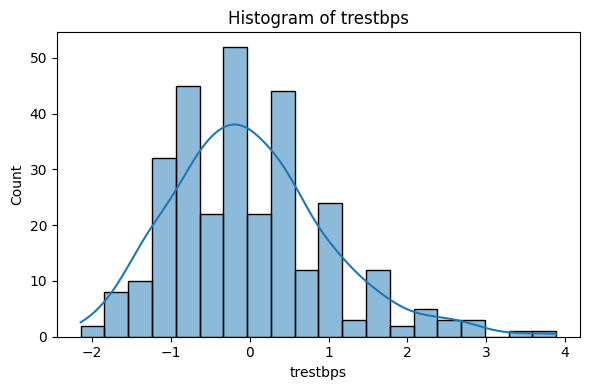

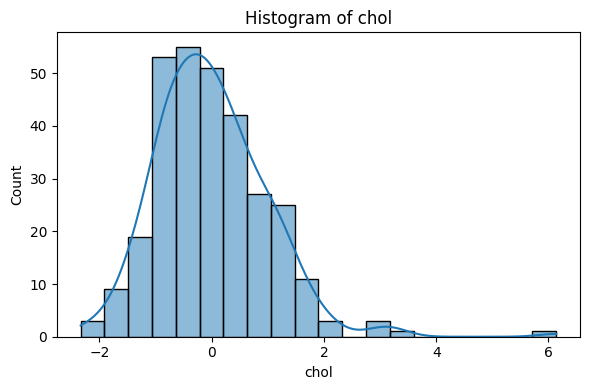

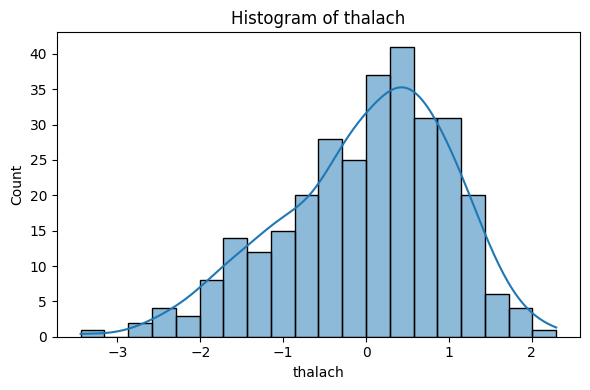

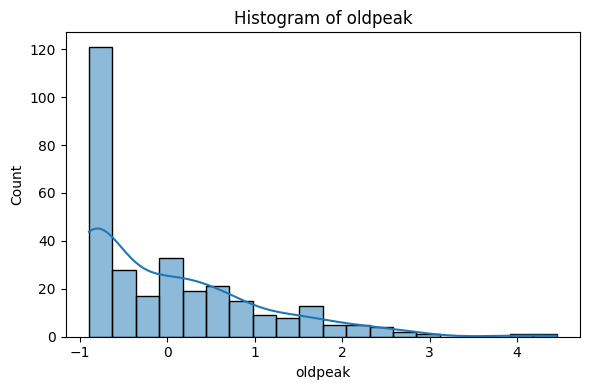

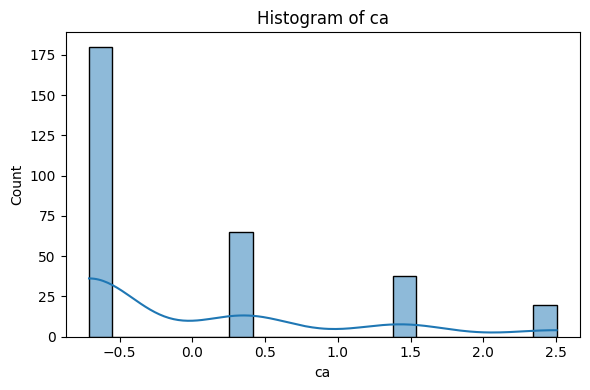

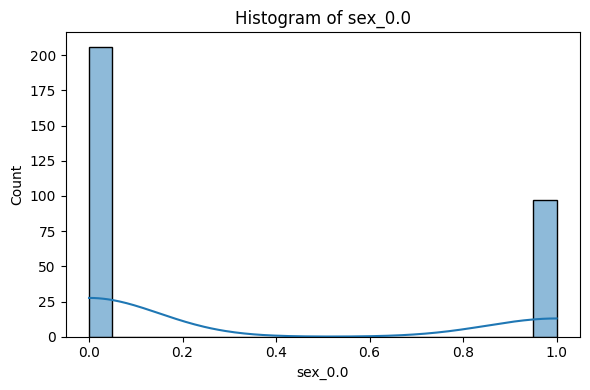

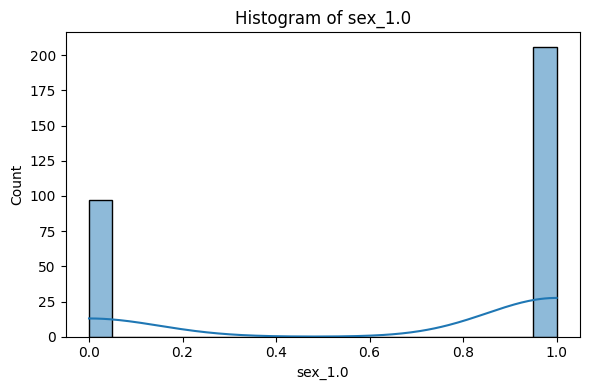

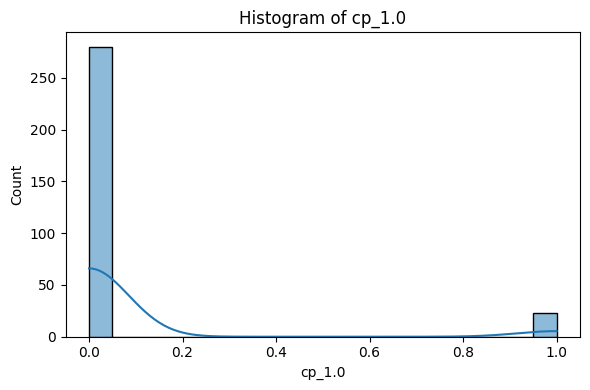

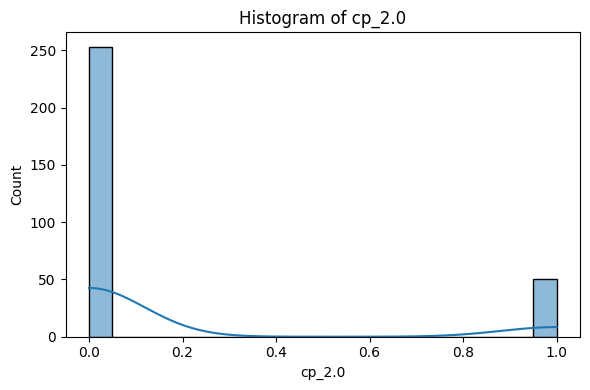

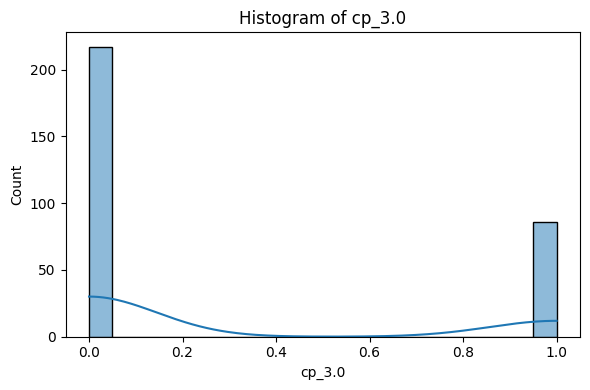

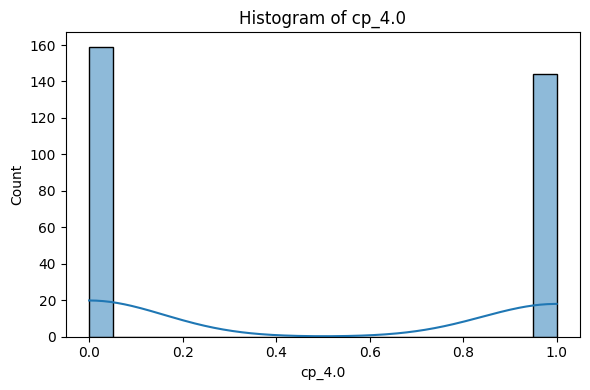

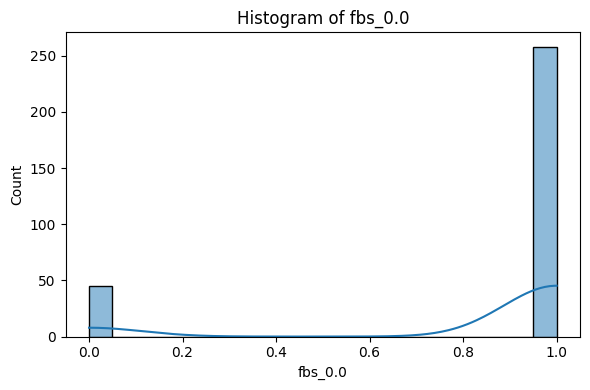

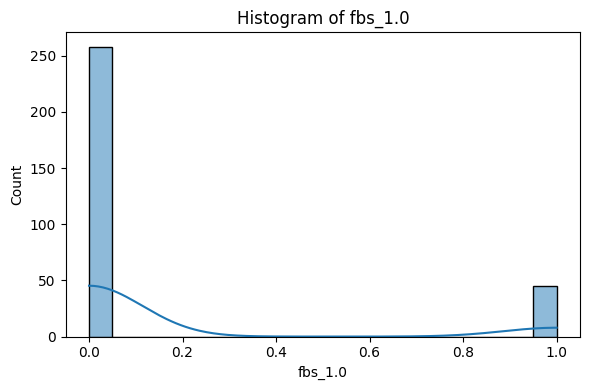

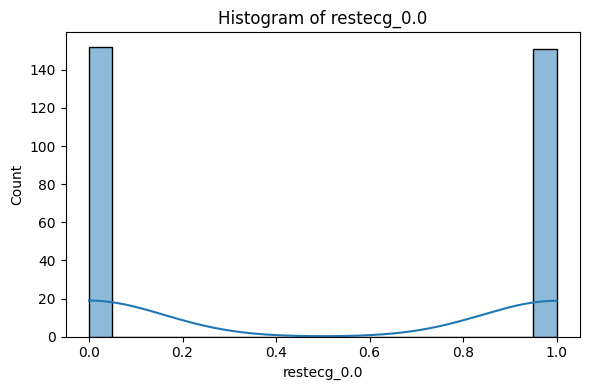

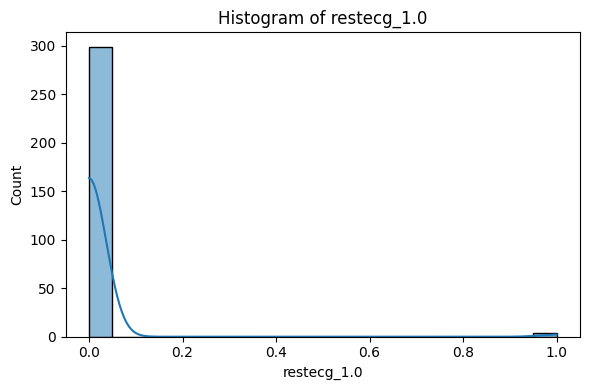

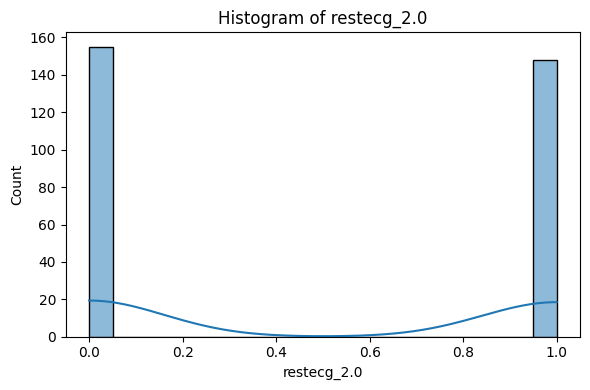

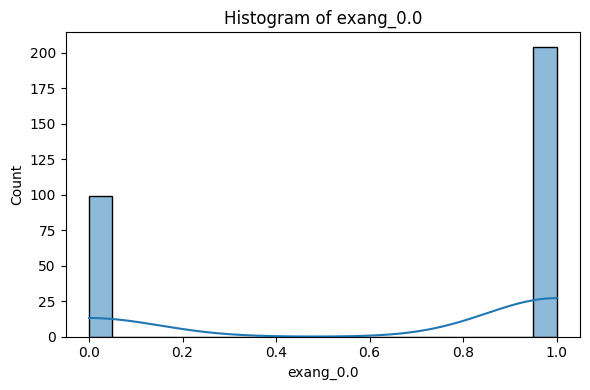

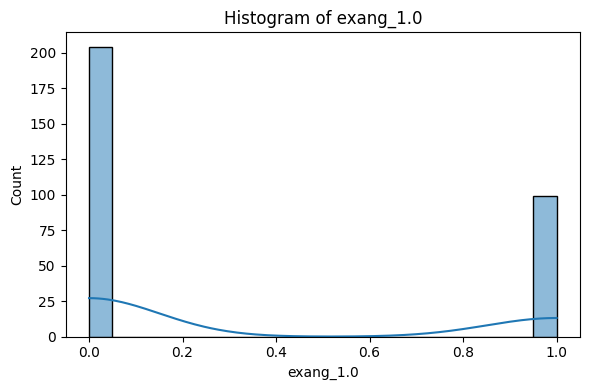

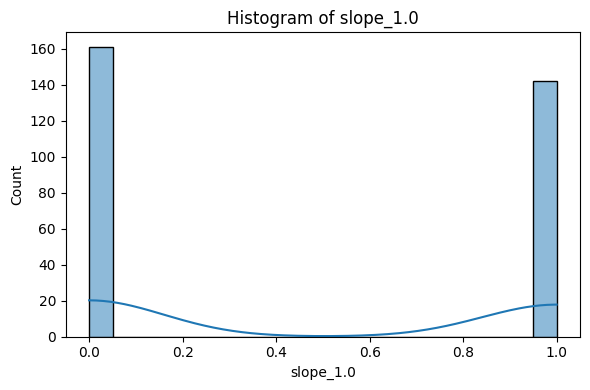

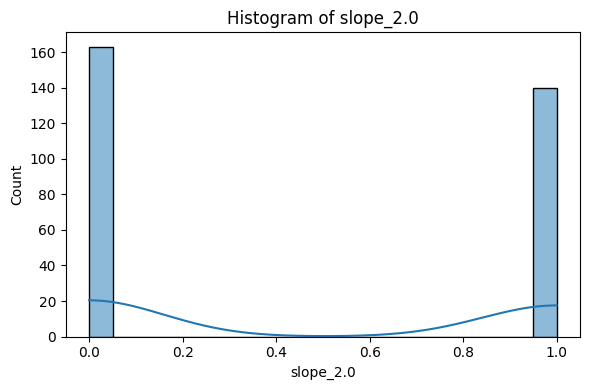

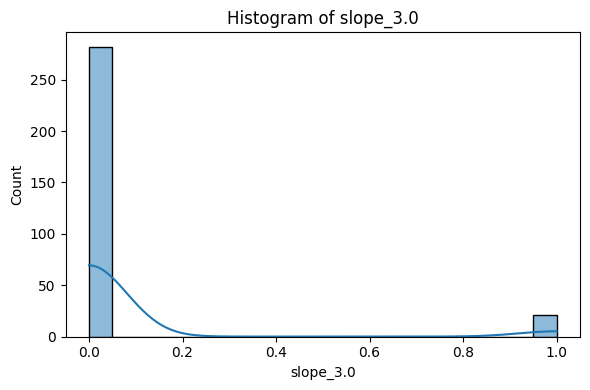

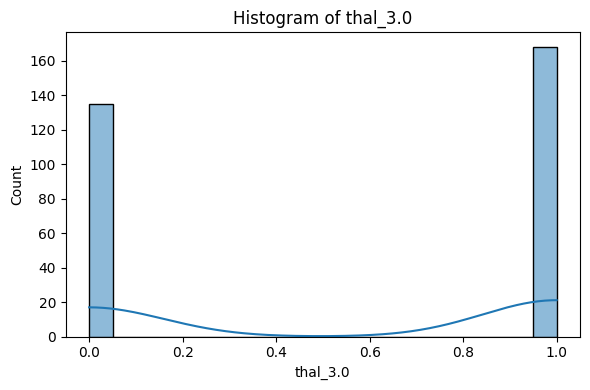

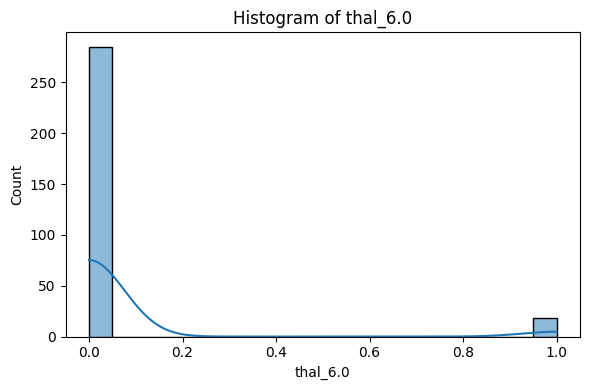

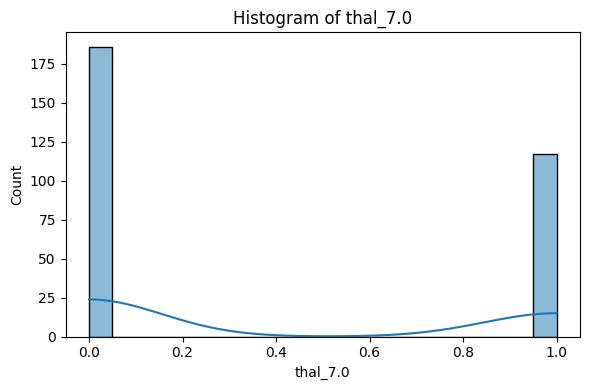

In [13]:
for col in clean_df.drop(columns=[label_col]).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(clean_df[col], kde=True, bins=20)
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

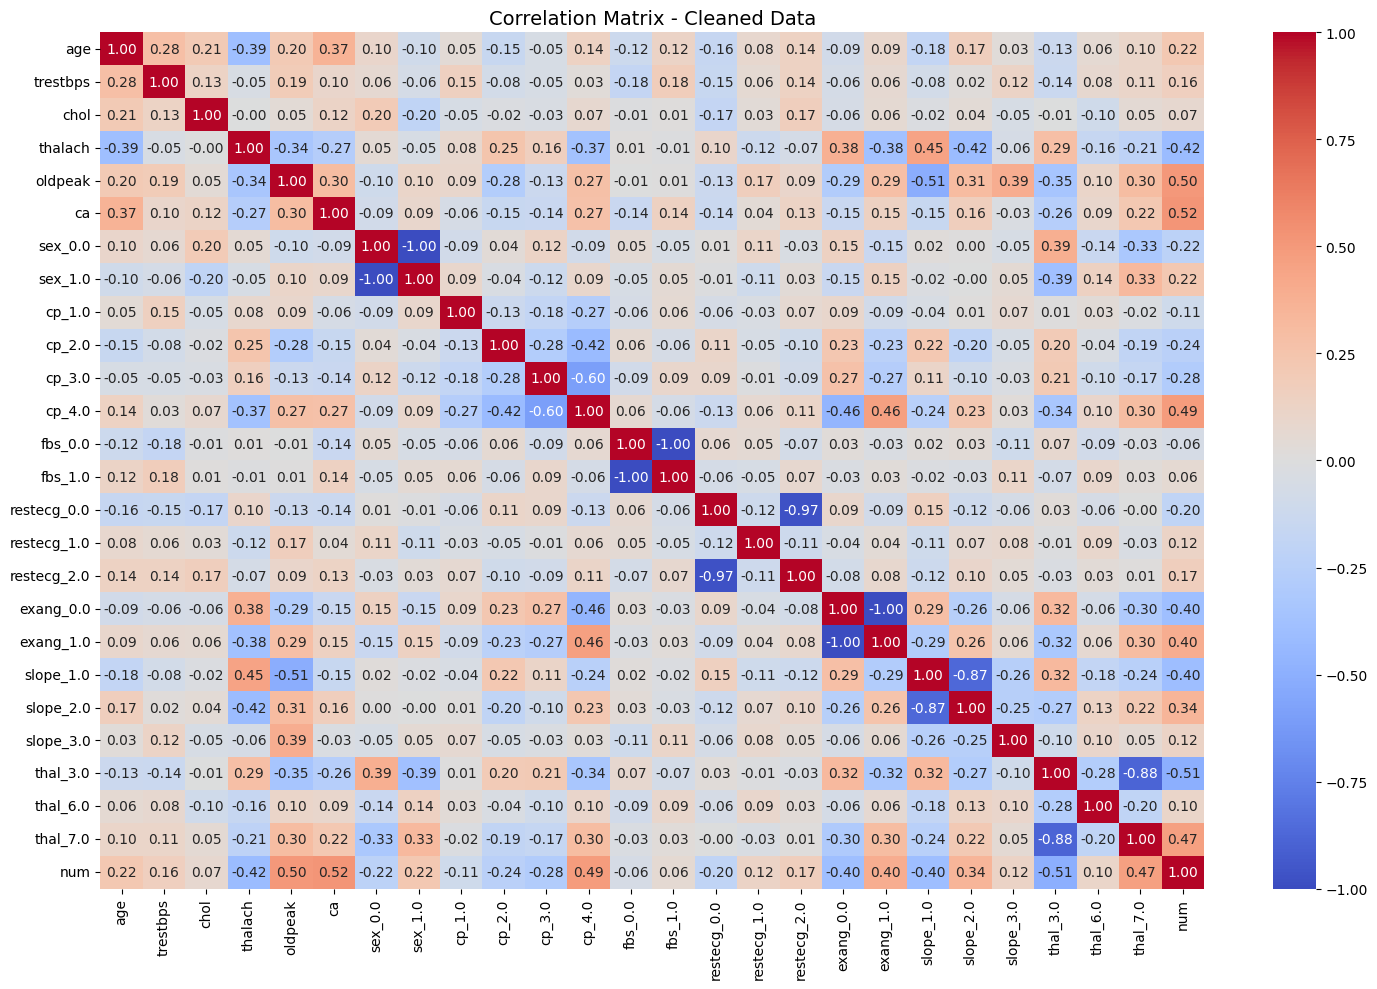

In [14]:
plt.figure(figsize=(15,10))
corr_matrix = clean_df.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)

plt.title("Correlation Matrix - Cleaned Data", fontsize=14)
plt.tight_layout()
plt.show()

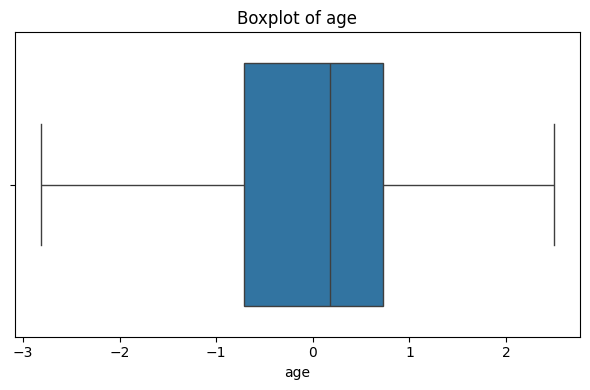

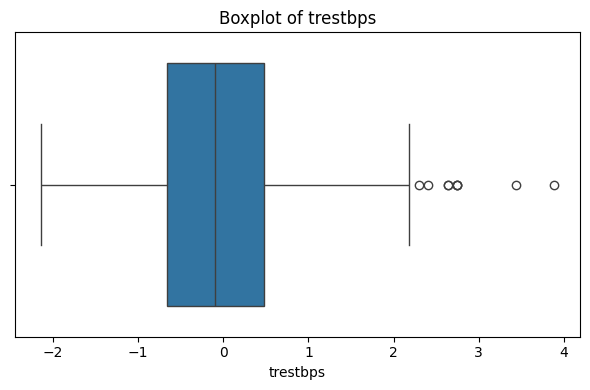

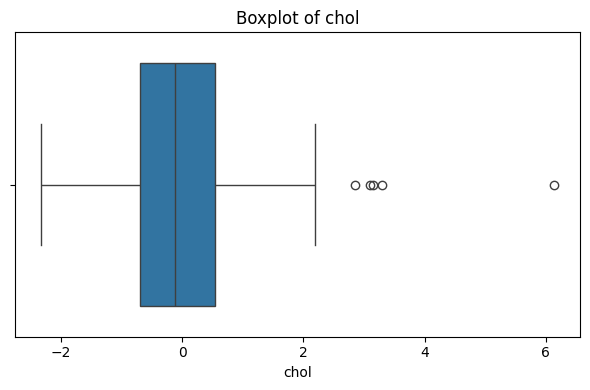

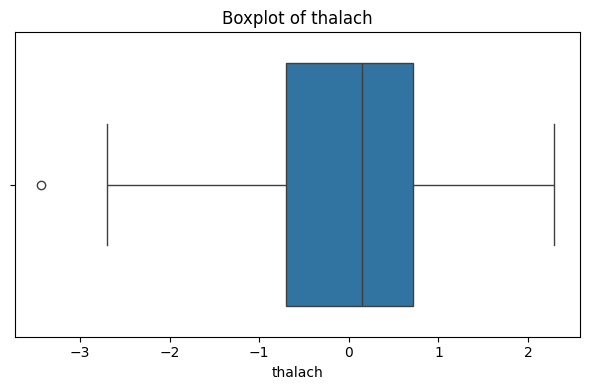

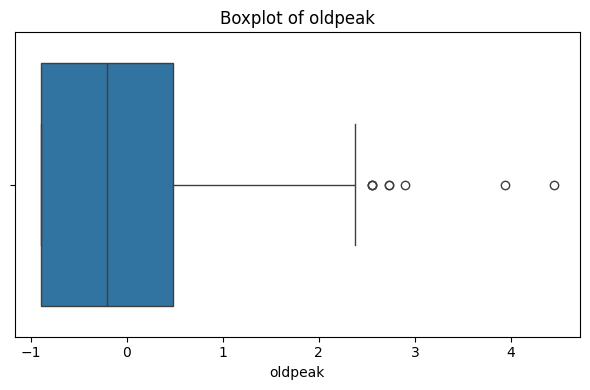

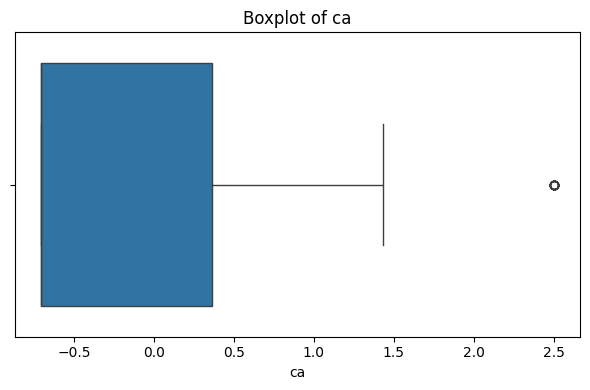

In [15]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=clean_df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Binarize the Target (0/1)

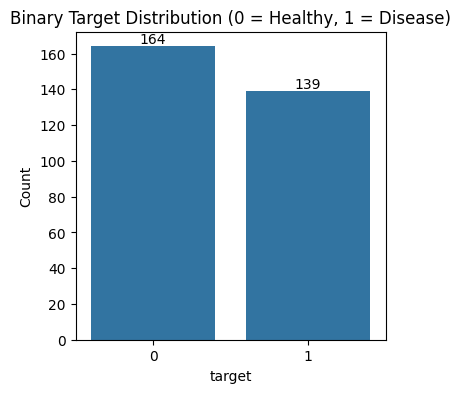

Target distribution after binarization:
 target
0    164
1    139
Name: count, dtype: int64


In [16]:
clean_df["target"] = (clean_df["num"] > 0).astype(int)
clean_df = clean_df.drop(columns=["num"])

plt.figure(figsize=(4,4))
ax = sns.countplot(x=clean_df["target"])
plt.title("Binary Target Distribution (0 = Healthy, 1 = Disease)")
plt.xlabel("target")
plt.ylabel("Count")

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()

print("Target distribution after binarization:\n", clean_df["target"].value_counts())

# Save Cleaned Dataset

In [17]:
os.makedirs("data", exist_ok=True)
OUTPUT_CSV = "data/heart_disease_cleaned.csv"
clean_df.to_csv(OUTPUT_CSV, index=False)
print("Cleaned dataset saved to:", OUTPUT_CSV)

Cleaned dataset saved to: data/heart_disease_cleaned.csv


# ***Thanks***